In [12]:
from module_memoire import exploratory_analysis, preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [ ]:
def undecided_decided(data,col):
    born_inf=data_without_stroke.groupby('clusters')[data.columns].mean()[col][0]-data_without_stroke.groupby('clusters')[data.columns].std()[col][0]
    born_sup=data_without_stroke.groupby('clusters')[data.columns].mean()[col][0]+data_without_stroke.groupby('clusters')[data.columns].std()[col][0]
    print("Lorsque stroke=0 est {}".format([born_inf,born_sup]))
    
    print('')
    born_inf_1=data_without_stroke.groupby('clusters')[data.columns].mean()[col][1]-data_without_stroke.groupby('clusters')[data.columns].std()[col][1]
    born_sup_1=data_without_stroke.groupby('clusters')[data.columns].mean()[col][1]+data_without_stroke.groupby('clusters')[data.columns].std()[col][1]
    print("Lorsque stroke=1 est {}".format([born_inf_1,born_sup_1]))

In [13]:
data=exploratory_analysis.import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv")

In [14]:
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [15]:
data_without_stroke=data.drop("stroke",axis=1)

# Kmeans on data without stroke

In [16]:
for col in data_without_stroke.select_dtypes("object"):
    data_without_stroke=preprocessing.to_encoded(data_without_stroke,col)

In [24]:
for col in data.select_dtypes("object"):
    data=preprocessing.to_encoded(data,col)

# Clustering 

In [20]:
kmean_1=KMeans(n_clusters=2,random_state=1234)
kmean_1.fit(data_without_stroke)
clusters_1=kmean_1.predict(data_without_stroke)

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
data_without_stroke["clusters"]=clusters_1

## centroides

In [22]:
data_without_stroke.groupby('clusters')[data_without_stroke.columns].mean()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.405736  40.891678      0.073108       0.038787      0.624354   
1         0.478680  58.213370      0.231087       0.151307      0.858322   

          work_type  Residence_type  avg_glucose_level        bmi  \
clusters                                                            
0          1.330512        0.505642          89.542835  27.941937   
1          1.137552        0.524072         201.911499  31.752957   

          smoking_status  clusters  
clusters                            
0               1.350024       0.0  
1               1.551582       1.0

# Undecided - Decided

In [41]:
undecided_decided(data_without_stroke,"age")

Lorsque stroke=0 est [18.477774877039565, 63.305581963581034]

Lorsque stroke=0 est [40.229509371889584, 76.19723065562073]


In [42]:
undecided_decided(data_without_stroke,"bmi")

Lorsque stroke=0 est [21.256728351430564, 34.62714564950972]

Lorsque stroke=0 est [25.26744785485483, 38.23846686316443]


In [43]:
undecided_decided(data_without_stroke,"avg_glucose_level")

Lorsque stroke=0 est [69.59627568759207, 109.48939427009479]

Lorsque stroke=0 est [173.4918048531453, 230.33119377133886]


In [25]:
data.groupby('stroke')[data.columns].mean()

gender        age  hypertension  heart_disease  ever_married  \
stroke                                                                   
0       0.415381  42.141348      0.087260       0.048172      0.646736   
1       0.435484  67.819839      0.266129       0.189516      0.883065   

        work_type  Residence_type  avg_glucose_level        bmi  \
stroke                                                            
0        1.310585        0.506444         104.569056  28.409698   
1        1.145161        0.544355         132.175565  30.186694   

        smoking_status  stroke  
stroke                          
0             1.372702     0.0  
1             1.508065     1.0

In [12]:
kmean_1.cluster_centers_

array([[4.05875441e-01, 4.08837133e+01, 7.30904818e-02, 3.87779083e-02,
        6.24206816e-01, 1.33090482e+00, 5.05757932e-01, 8.95577039e+01,
        2.79395300e+01, 1.34970623e+00],
       [4.77961433e-01, 5.82839118e+01, 2.31404959e-01, 1.51515152e-01,
        8.59504132e-01, 1.13498623e+00, 5.23415978e-01, 2.01979132e+02,
        3.17723140e+01, 1.55371901e+00]])

In [26]:
data_without_stroke.groupby('clusters')[data_without_stroke.columns].std()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.491092  22.413904      0.260344       0.193110      0.484346   
1         0.499889  17.983861      0.421818       0.358594      0.348960   

          work_type  Residence_type  avg_glucose_level       bmi  \
clusters                                                           
0          0.883171        0.500027          19.946559  6.685209   
1          0.688597        0.499764          28.419694  6.485510   

          smoking_status  clusters  
clusters                            
0               1.085550       0.0  
1               0.973347       0.0

In [2]:
40.891678+22.413904

63.305582

In [27]:
data.groupby('stroke')[data.columns].std()

gender        age  hypertension  heart_disease  ever_married  \
stroke                                                                   
0       0.492840  22.345036      0.282245       0.214153      0.478034   
1       0.496823  12.670565      0.442826       0.392711      0.321993   

        work_type  Residence_type  avg_glucose_level       bmi  \
stroke                                                           
0        0.869488        0.500011          43.602188  6.833637   
1        0.638743        0.499036          61.771083  5.658245   

        smoking_status  stroke  
stroke                          
0             1.076192     0.0  
1             0.985695     0.0

In [15]:
##plot 
def plot_centroid(col_1,col_2):
    plt.scatter(data_without_stroke[col_1],data_without_stroke[col_2],c=data_without_stroke.clusters)
    val_1=data_without_stroke.groupby('clusters')[data_without_stroke.columns].mean()[col_1][0]
    val_2=data_without_stroke.groupby('clusters')[data_without_stroke.columns].mean()[col_2][0]
    
    val_3=data_without_stroke.groupby('clusters')[data_without_stroke.columns].mean()[col_1][1]
    val_4=data_without_stroke.groupby('clusters')[data_without_stroke.columns].mean()[col_2][1]
    
    plt.plot(val_1,val_2,color='green',marker='D')
    plt.plot(val_3,val_4,color='red',marker='D')
    plt.legend()
    plt.xlabel('{}'.format(col_1))
    plt.ylabel('{}'.format(col_2))
    plt.show()

In [16]:
col_1=data_without_stroke.columns

In [17]:
interact(plot_centroid,col_1=col_1,col_2=col_1)

interactive(children=(Dropdown(description='col_1', options=('gender', 'age', 'hypertension', 'heart_disease',…

<function __main__.plot_centroid(col_1, col_2)>

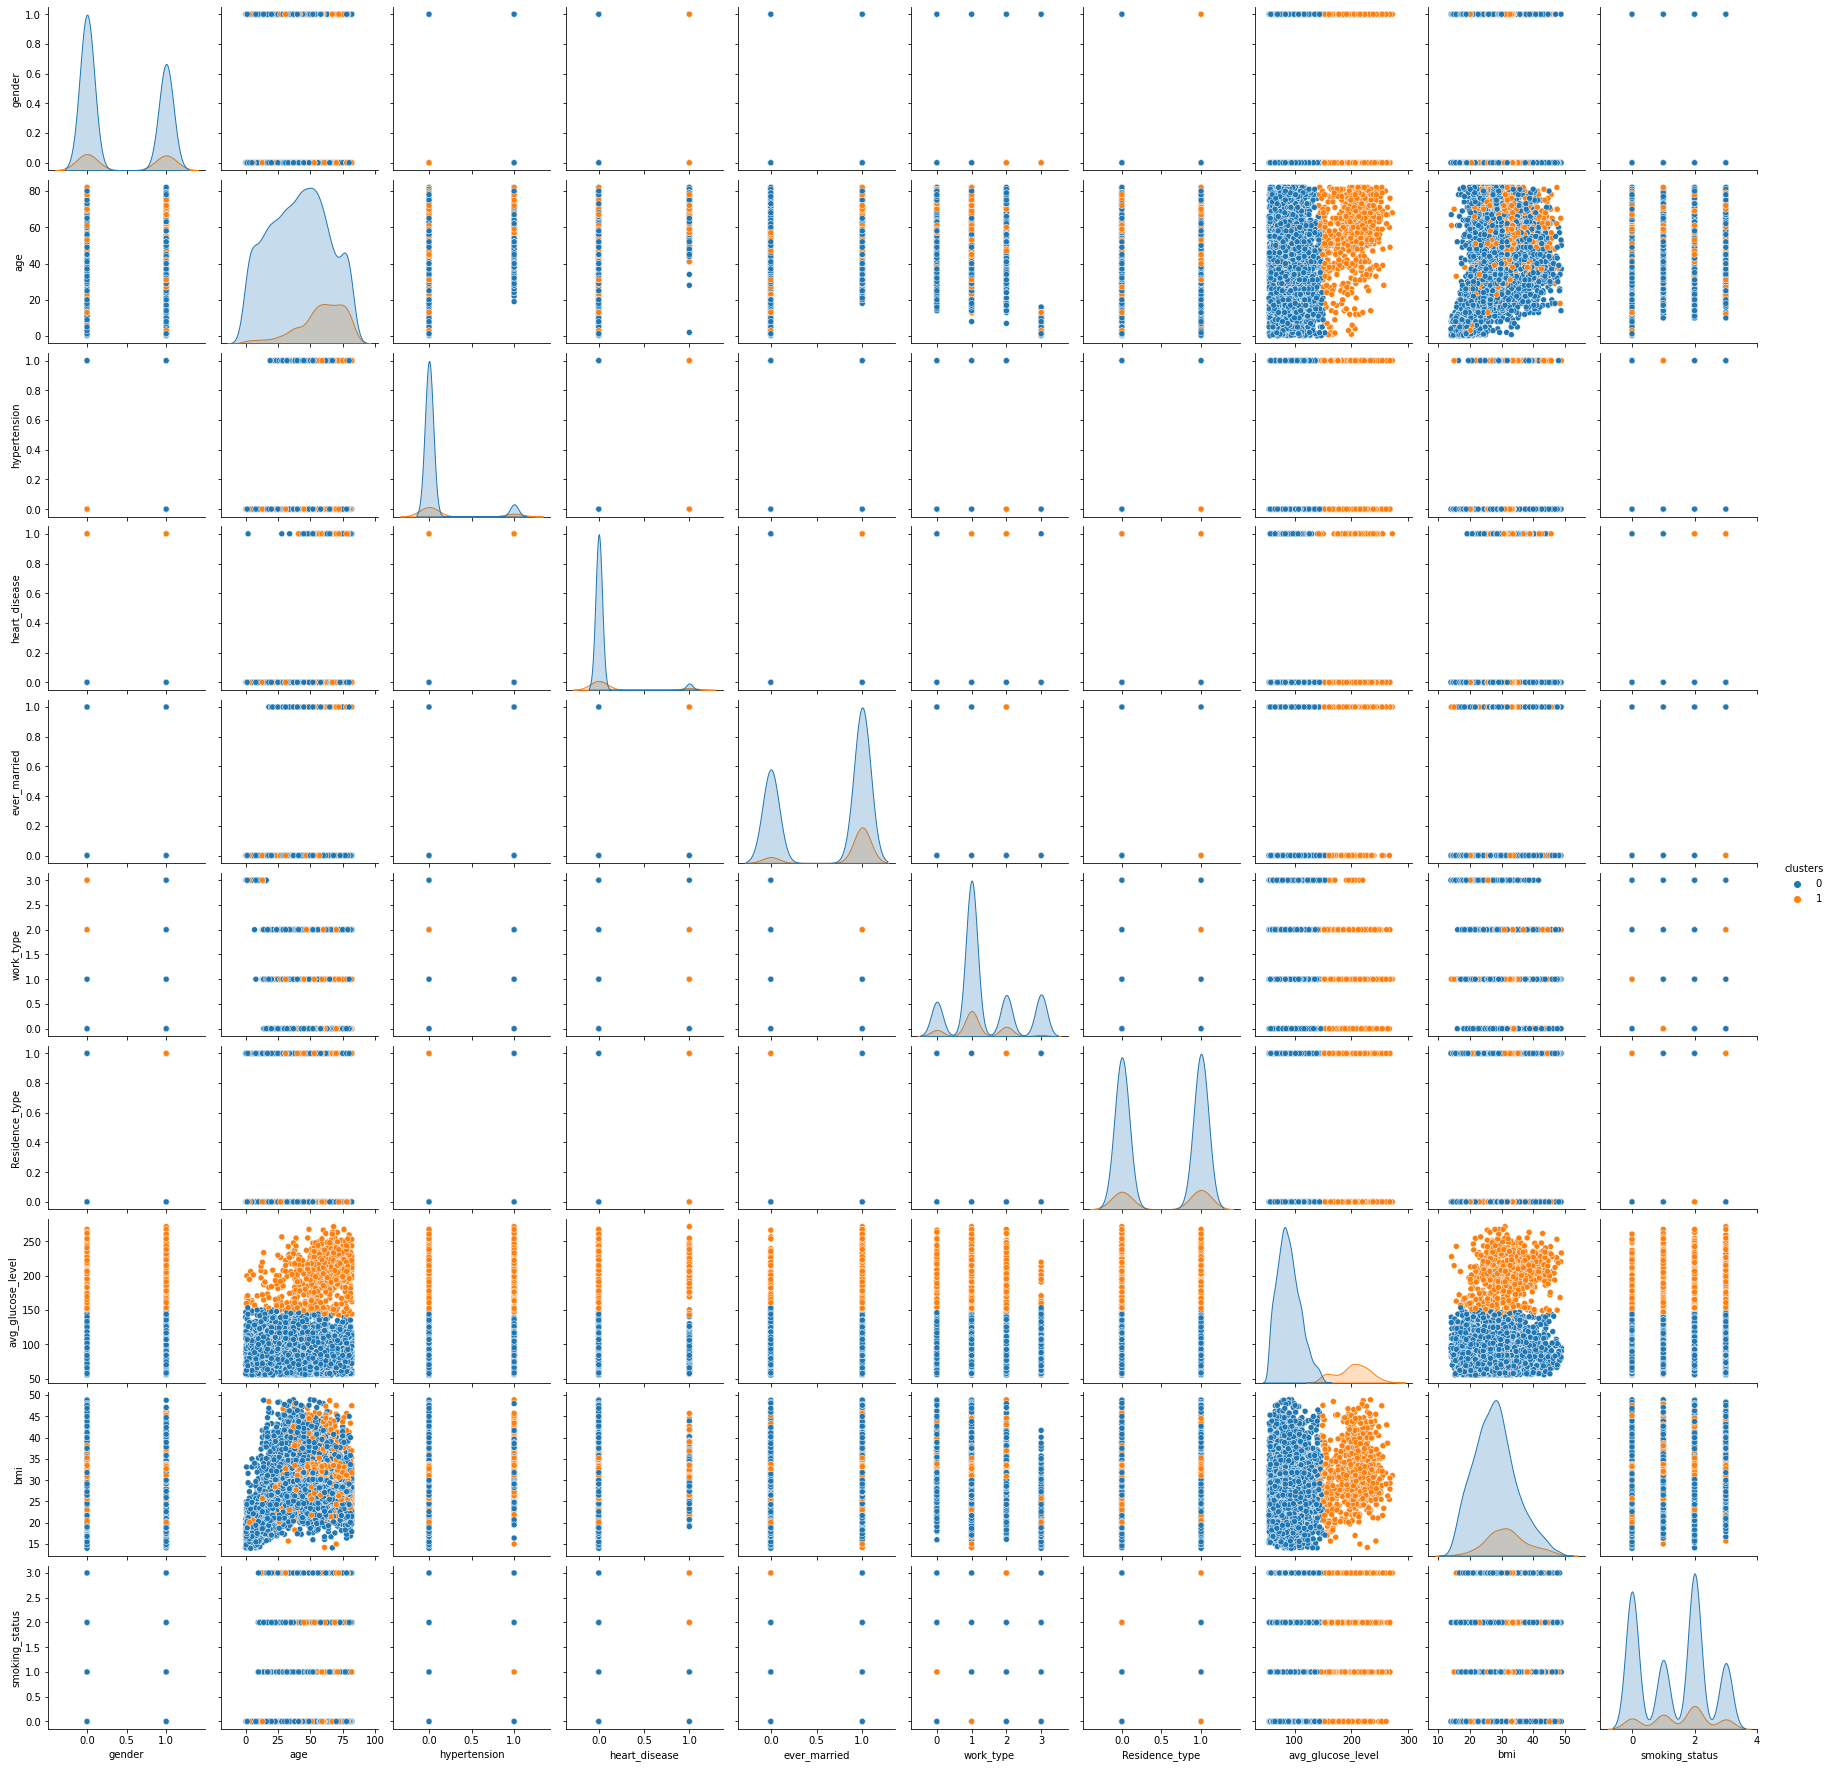

In [18]:
sns.pairplot(data_without_stroke,hue="clusters")

# KModes

In [43]:
numerical_var=["age","avg_glucose_level","bmi"]
categorical_index=[0,2,3,4,5,6,9]

In [42]:
data_without_stroke

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  
0             Urban             228.69  36.6  formerly smoked  
1             Rural             105.92  32.5     never smoked  
2             Urban             171.23  34.4           smokes  
3             Rural             174.12  24.0     never smoked  
4             Urban             186.21  29.0  formerly smoked  
...             ...                ...   ...              ...  
4976          Rural              70.15  29.8  formerly smoked  
4977          Urban             191.15  31.1           smokes  
4978          Rural              95.02  31.8           smokes  
4979          Rural              83.94  30.0           smokes  
4980          Urban              83.75  29.1     never smoked  

[4981 rows x 10 columns]

In [44]:
kproto = KPrototypes(n_clusters=2, verbose=2).fit(data_without_stroke.values,categorical=categorical_index)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 643, ncost: 5150022.833206903
Run: 1, iteration: 2/100, moves: 160, ncost: 5029565.196083799
Run: 1, iteration: 3/100, moves: 36, ncost: 5023163.215822566
Run: 1, iteration: 4/100, moves: 10, ncost: 5022678.305320567
Run: 1, iteration: 5/100, moves: 4, ncost: 5022593.301169687
Run: 1, iteration: 6/100, moves: 0, ncost: 5022593.301169687
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1239, ncost: 5716649.49436002
Run: 2, iteration: 2/100, moves: 473, ncost: 5051384.213122142
Run: 2, iteration: 3/100, moves: 75, ncost: 5024259.280638731
Run: 2, iteration: 4/100, moves: 19, ncost: 5022740.004403864
Run: 2, iteration: 5/100, moves: 6, ncost: 5022593.301169692
Run: 2, iteration: 6/100

In [46]:
# Prediction
clusters = kproto.predict(data_without_stroke.values, categorical=categorical_index)

In [49]:
data_without_stroke['cluster_kproto'] = list(clusters)

In [52]:
data_without_stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  cluster_kproto  
0          Urban             228.69  36.6  formerly smoked               0  
1          Rural             105.92  32.5     never smoked               1  
2          Urban             171.23  34.4           smokes               0  
3          Rural             174.12  24.0     never smoked               0  
4          Urban             186.21  29.0  formerly smoked               0

In [54]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['58.21337001375518' '201.9114993122402' '31.752957359009404' 'Female'
  '0' '0' 'Yes' 'Private' 'Urban' 'never smoked']
 ['40.8916784203103' '89.54283497884333' '27.941937000470176' 'Female'
  '0' '0' 'Yes' 'Private' 'Urban' 'never smoked']]


In [55]:
data_without_stroke.groupby("cluster_kproto")[["age","avg_glucose_level","bmi"]].mean()

age  avg_glucose_level        bmi
cluster_kproto                                         
0               58.213370         201.911499  31.752957
1               40.891678          89.542835  27.941937

In [56]:
data_without_stroke.groupby("cluster_kproto")[["age","avg_glucose_level","bmi"]].std()

age  avg_glucose_level       bmi
cluster_kproto                                        
0               17.983861          28.419694  6.485510
1               22.413904          19.946559  6.685209

# kmeans with num_var 

In [57]:
num_data=data[numerical_var]

In [58]:
num_data.head()

age  avg_glucose_level   bmi
0  67.0             228.69  36.6
1  80.0             105.92  32.5
2  49.0             171.23  34.4
3  79.0             174.12  24.0
4  81.0             186.21  29.0

In [60]:
kmeans_num=KMeans(n_clusters=2)
kmeans_num.fit(num_data)
clusters_1=kmeans_num.predict(num_data)

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
num_data["clusters"]=clusters_1

<ipython-input-61-b3efda7446c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["clusters"]=clusters_1


In [62]:
num_data.groupby("clusters")[num_data.columns].mean()

age  avg_glucose_level        bmi  clusters
clusters                                                   
0         40.891678          89.542835  27.941937       0.0
1         58.213370         201.911499  31.752957       1.0

In [63]:
num_data.groupby("clusters")[num_data.columns].std()

age  avg_glucose_level       bmi  clusters
clusters                                                  
0         22.413904          19.946559  6.685209       0.0
1         17.983861          28.419694  6.485510       0.0

# sortir l'avg des data et refaire les modeles

In [64]:
data_without_stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  cluster_kproto  
0          Urban             228.69  36.6  formerly smoked               0  
1          Rural             105.92  32.5     never smoked               1  
2          Urban             171.23  34.4           smokes               0  
3          Rural             174.12  24.0     never smoked               0  
4          Urban             186.21  29.0  formerly smoked               0

In [66]:
data_without_avg=data_without_stroke.drop(["avg_glucose_level","cluster_kproto"],axis=1)

In [68]:
for col in data_without_avg.select_dtypes("object"):
    data_without_avg=preprocessing.to_encoded(data_without_avg,col)

In [70]:
data_without_avg.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type   bmi  smoking_status  
0               1  36.6               1  
1               0  32.5               2  
2               1  34.4               3  
3               0  24.0               2  
4               1  29.0               1

### kmean

In [72]:
kmean_avg=KMeans(n_clusters=2)
kmean_avg.fit(data_without_avg)
cluster_avg=kmean_avg.predict(data_without_avg)
data_without_avg["clusters_kmean"]=cluster_avg

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
data_without_avg.groupby("clusters_kmean")[data_without_avg.columns].mean()

gender        age  hypertension  heart_disease  \
clusters_kmean                                                     
0               0.412004  21.966300      0.017148       0.001354   
1               0.419892  60.613743      0.159494       0.098373   

                ever_married  work_type  Residence_type        bmi  \
clusters_kmean                                                       
0                   0.336643   1.583032        0.500903  26.107491   
1                   0.916456   1.077396        0.514286  30.414177   

                smoking_status  clusters_kmean  
clusters_kmean                                  
0                     1.162004             0.0  
1                     1.553707             1.0

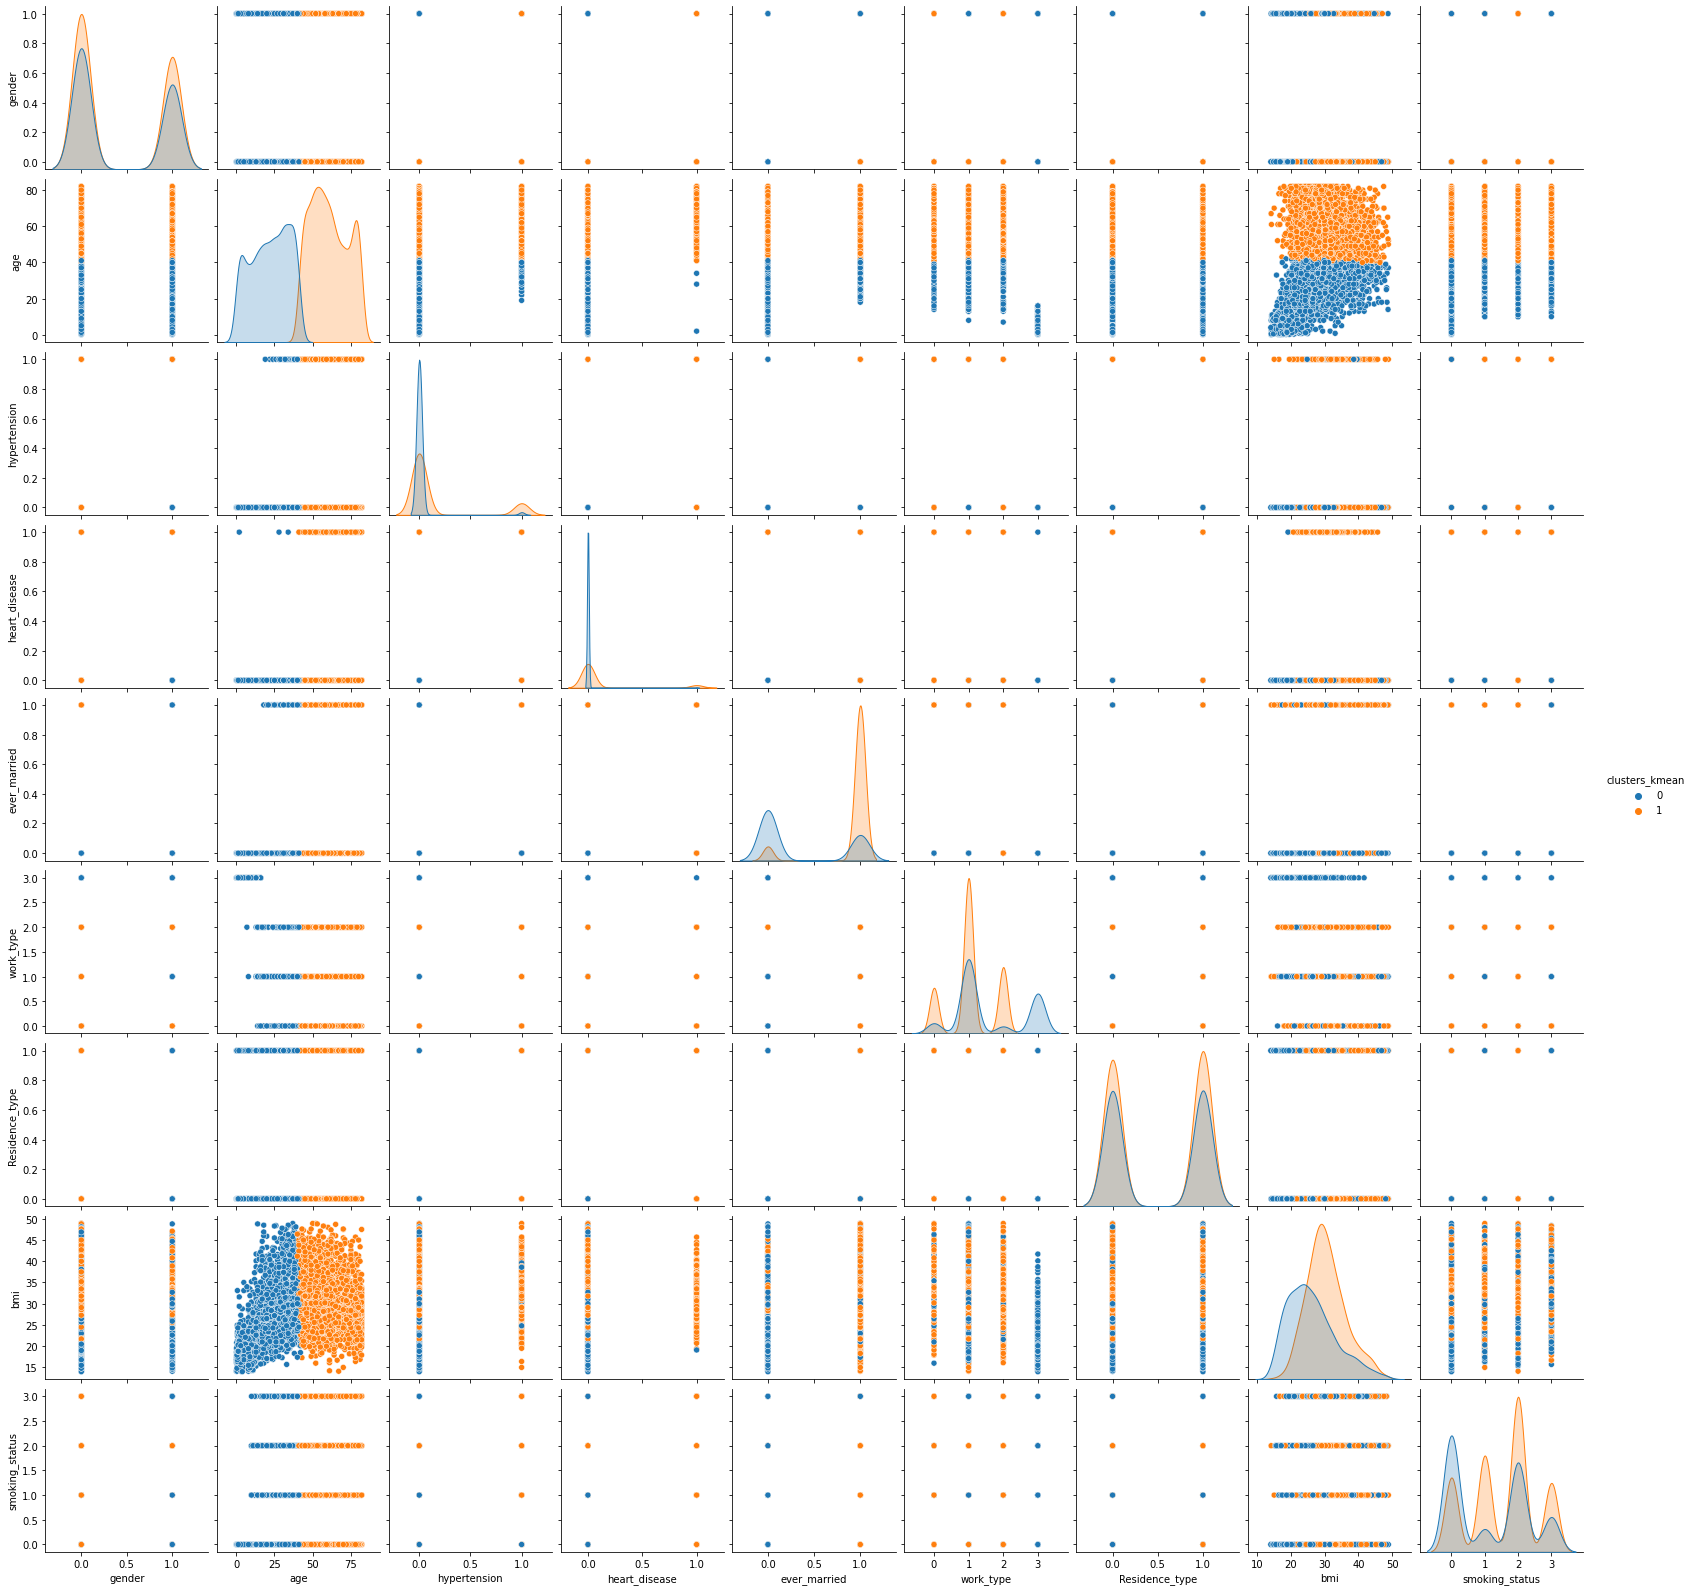

In [76]:
sns.pairplot(data_without_avg,hue="clusters_kmean")

# Clustering on all data

In [19]:
kmeans_2=KMeans(n_clusters=2)
kmeans_2.fit(data)
clusters_1=kmeans_2.predict(data)

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
data["clusters_1"]=clusters_1

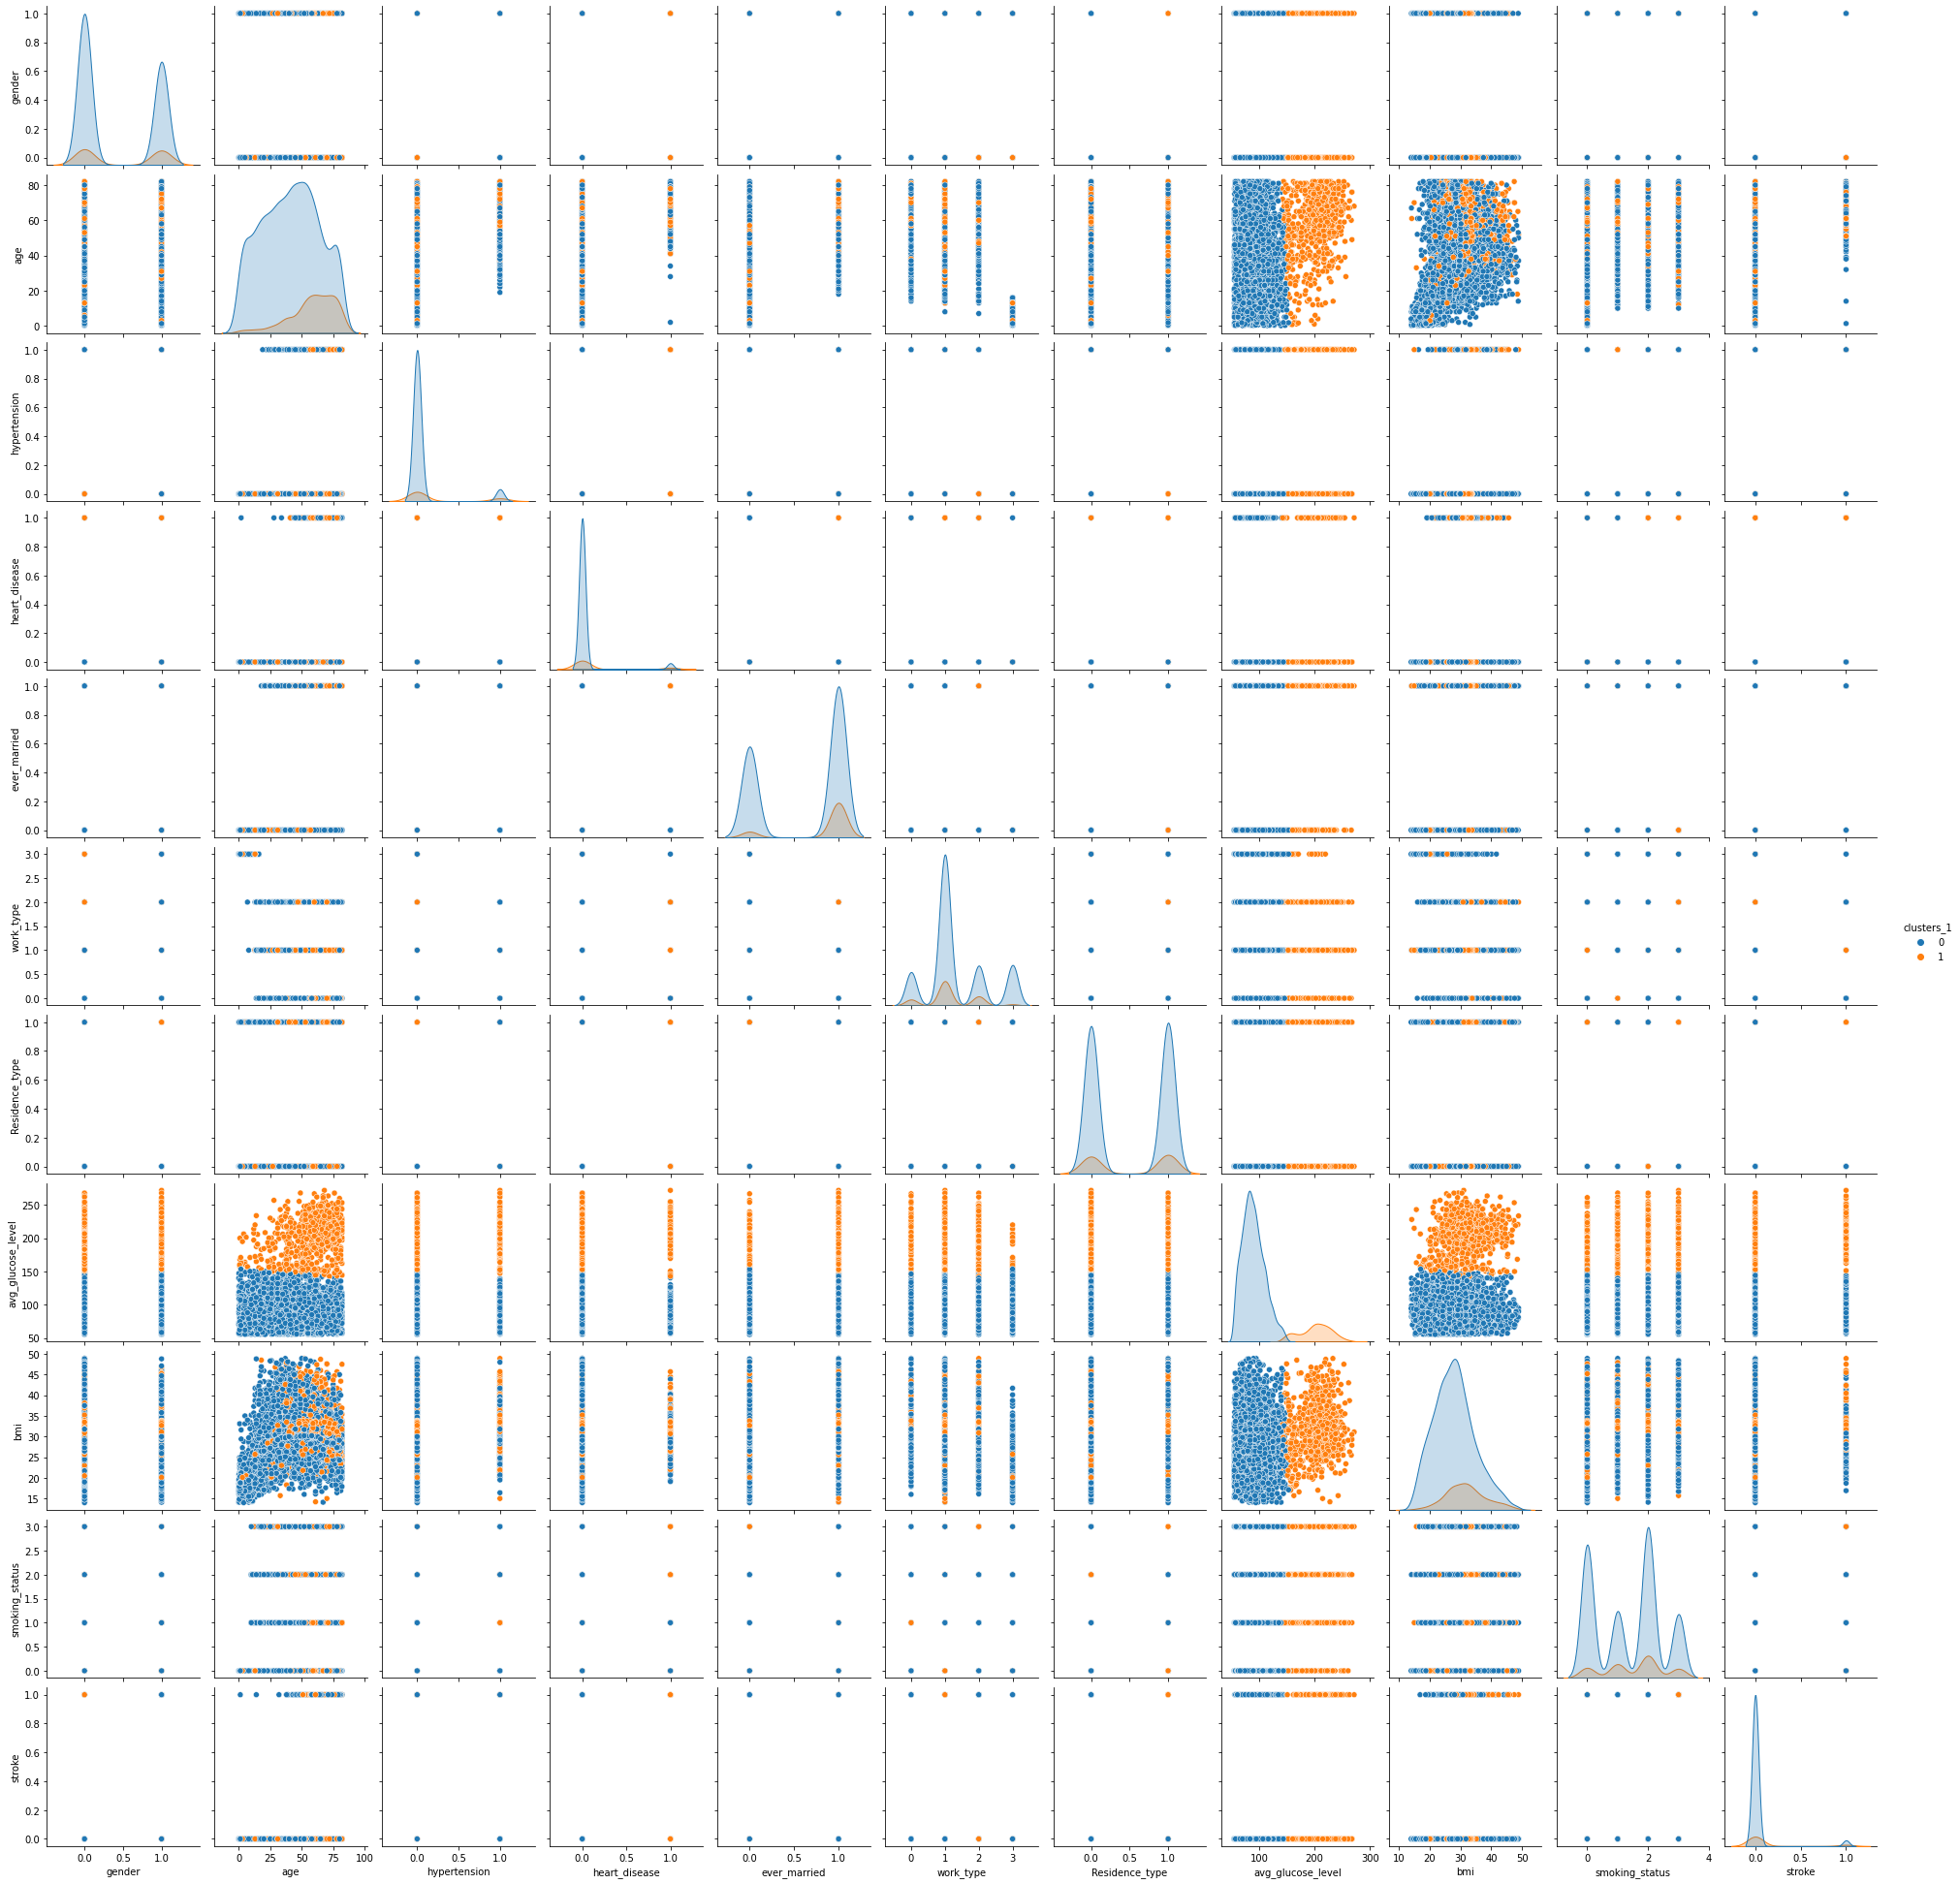

In [21]:
sns.pairplot(data,hue="clusters_1")

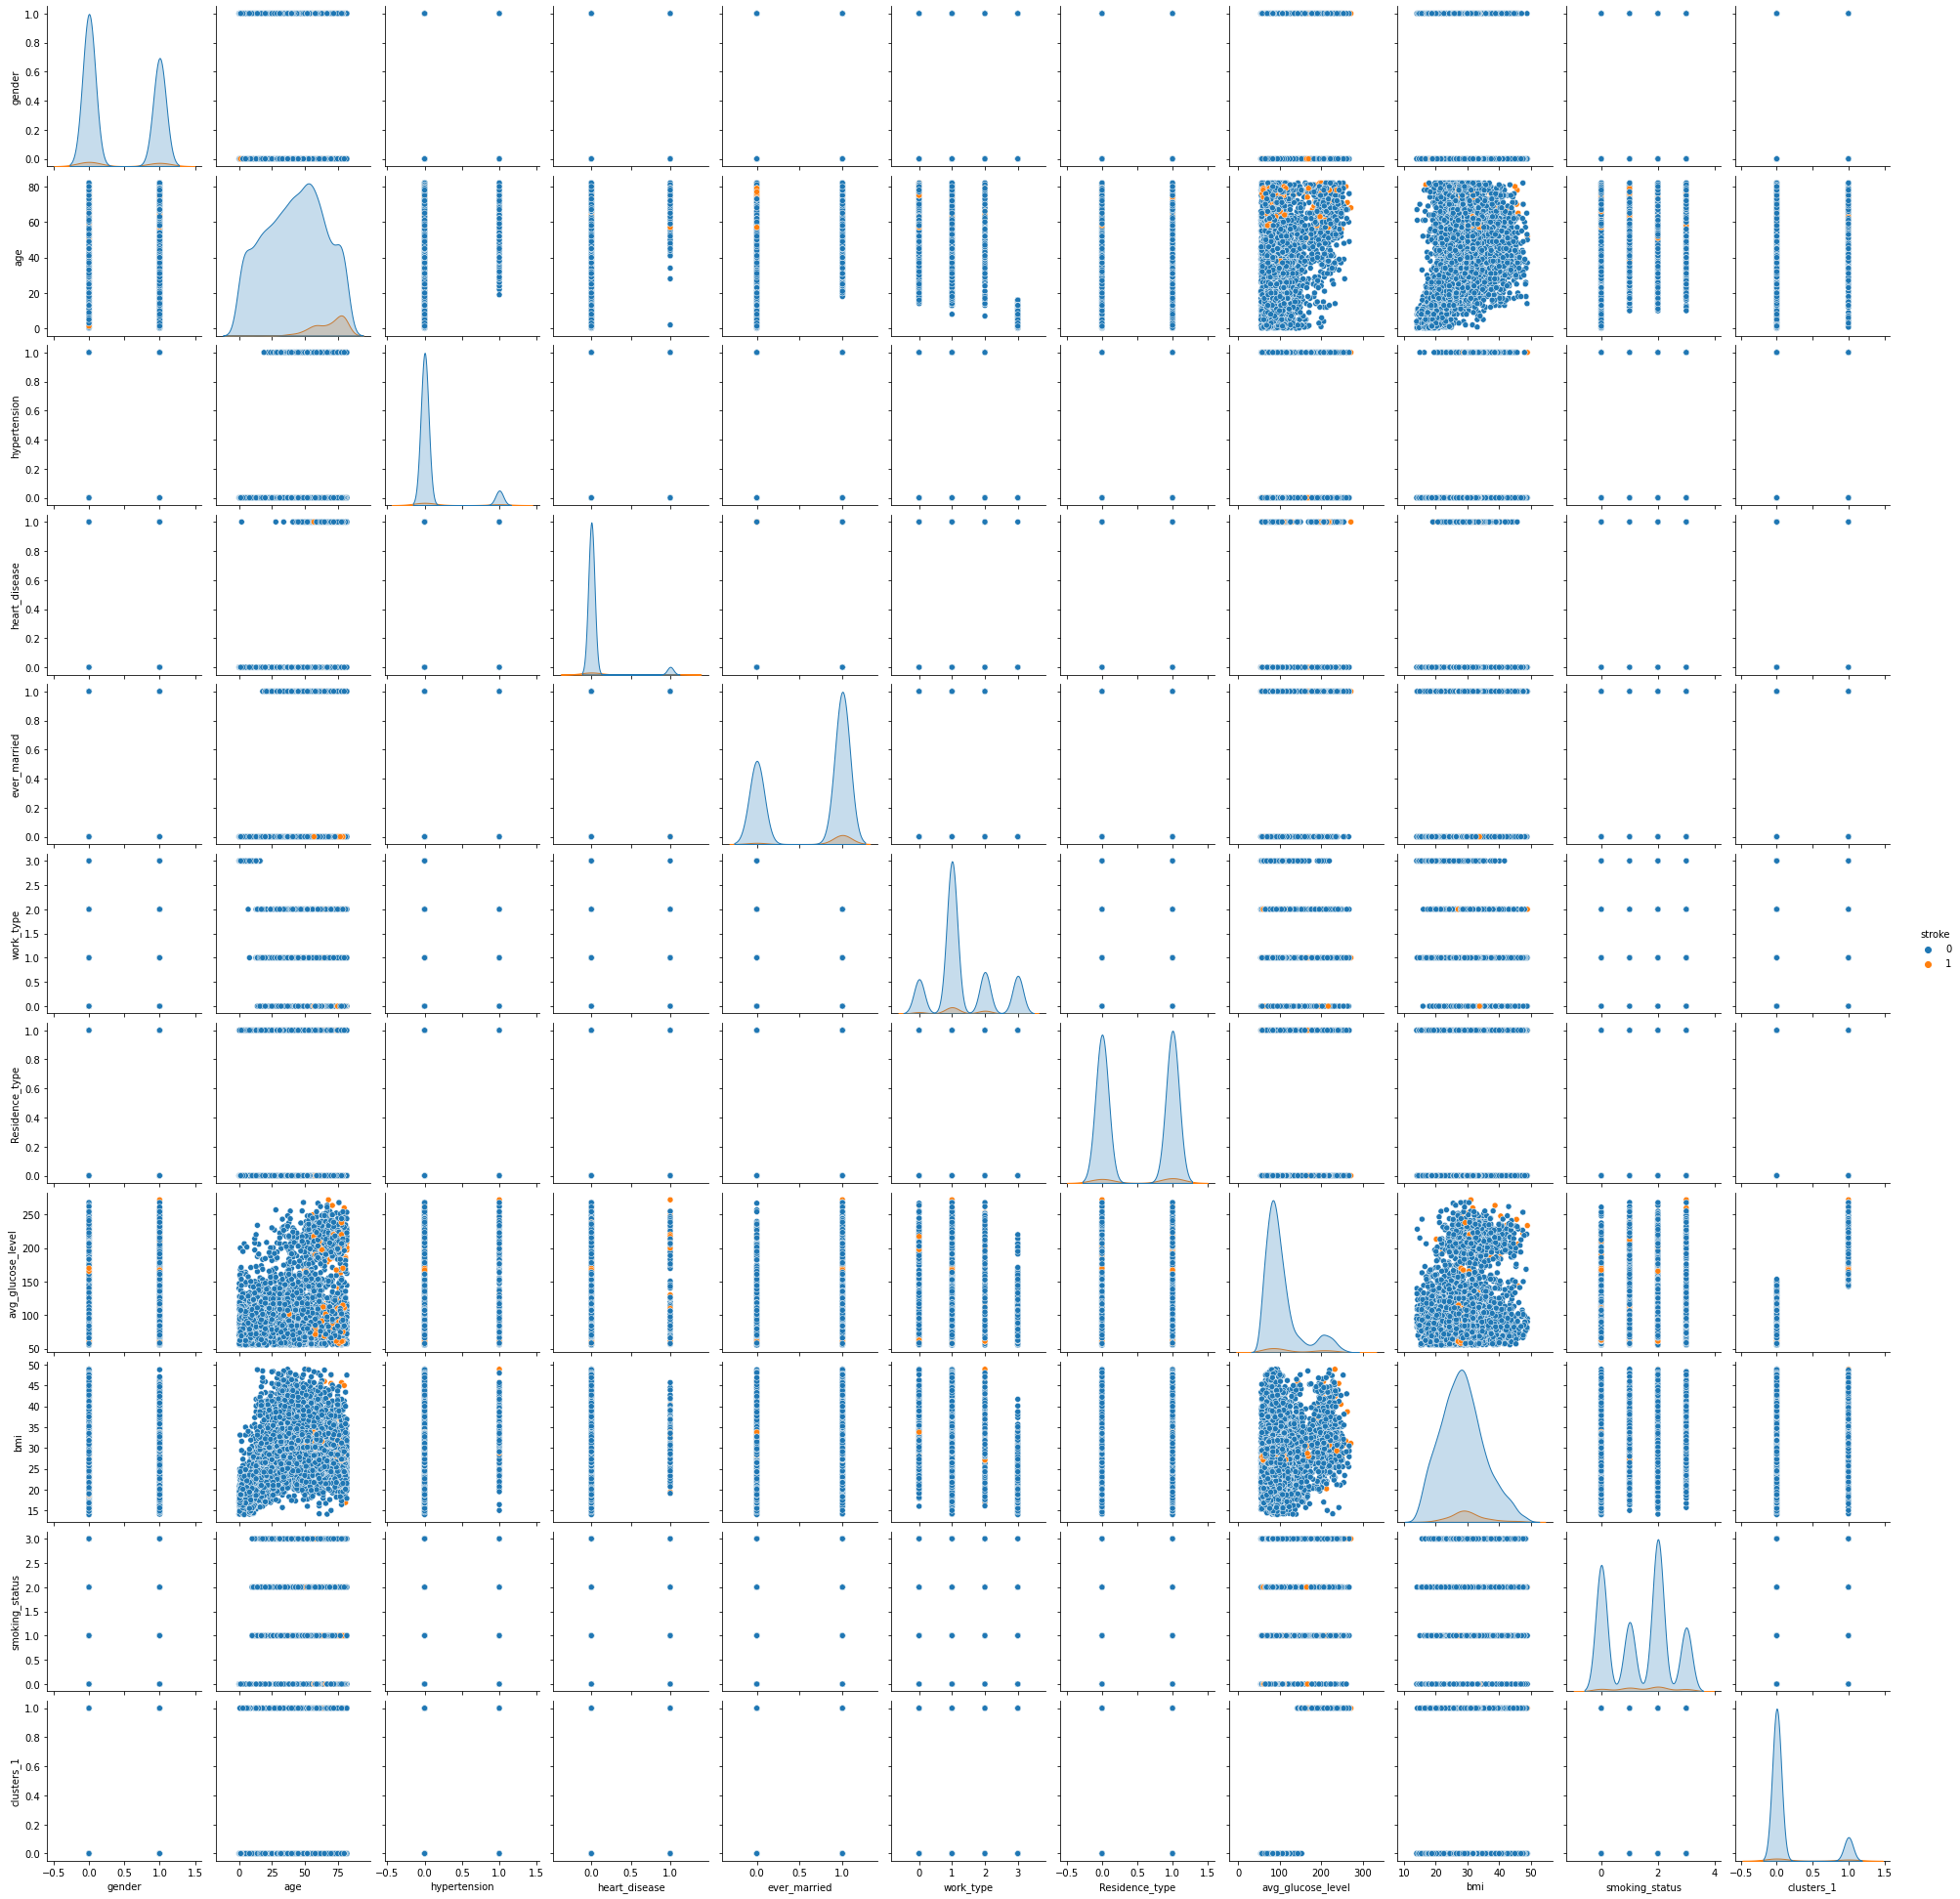

In [22]:
sns.pairplot(data,hue="stroke")

## isolation of sick persons

In [23]:
sick_person=data[data.stroke==1]

In [24]:
sick_person.head(7)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   
5       1  74.0             1              1             1          1   
6       0  69.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  clusters_1  
0               1             228.69  36.6               1       1           1  
1               0             105.92  32.5               2       1           0  
2               1             171.23  34.4               3       1           1  
3               0             174.12  24.0               2       1           1  
4               1             186.21  29.0               1       1           1  
5               0              70.09  27.4               2       1           0  
6               1              94.39  22.8               2       1           0

In [25]:
data_sick=sick_person.copy()

In [26]:
data_sick.drop(["stroke","clusters_1"],axis=1,inplace=True)

In [27]:
sick_kmeans=KMeans()
sick_kmeans.fit(data_sick)
sick_clusters=sick_kmeans.predict(data_sick)

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
data_sick["clusters"]=sick_clusters

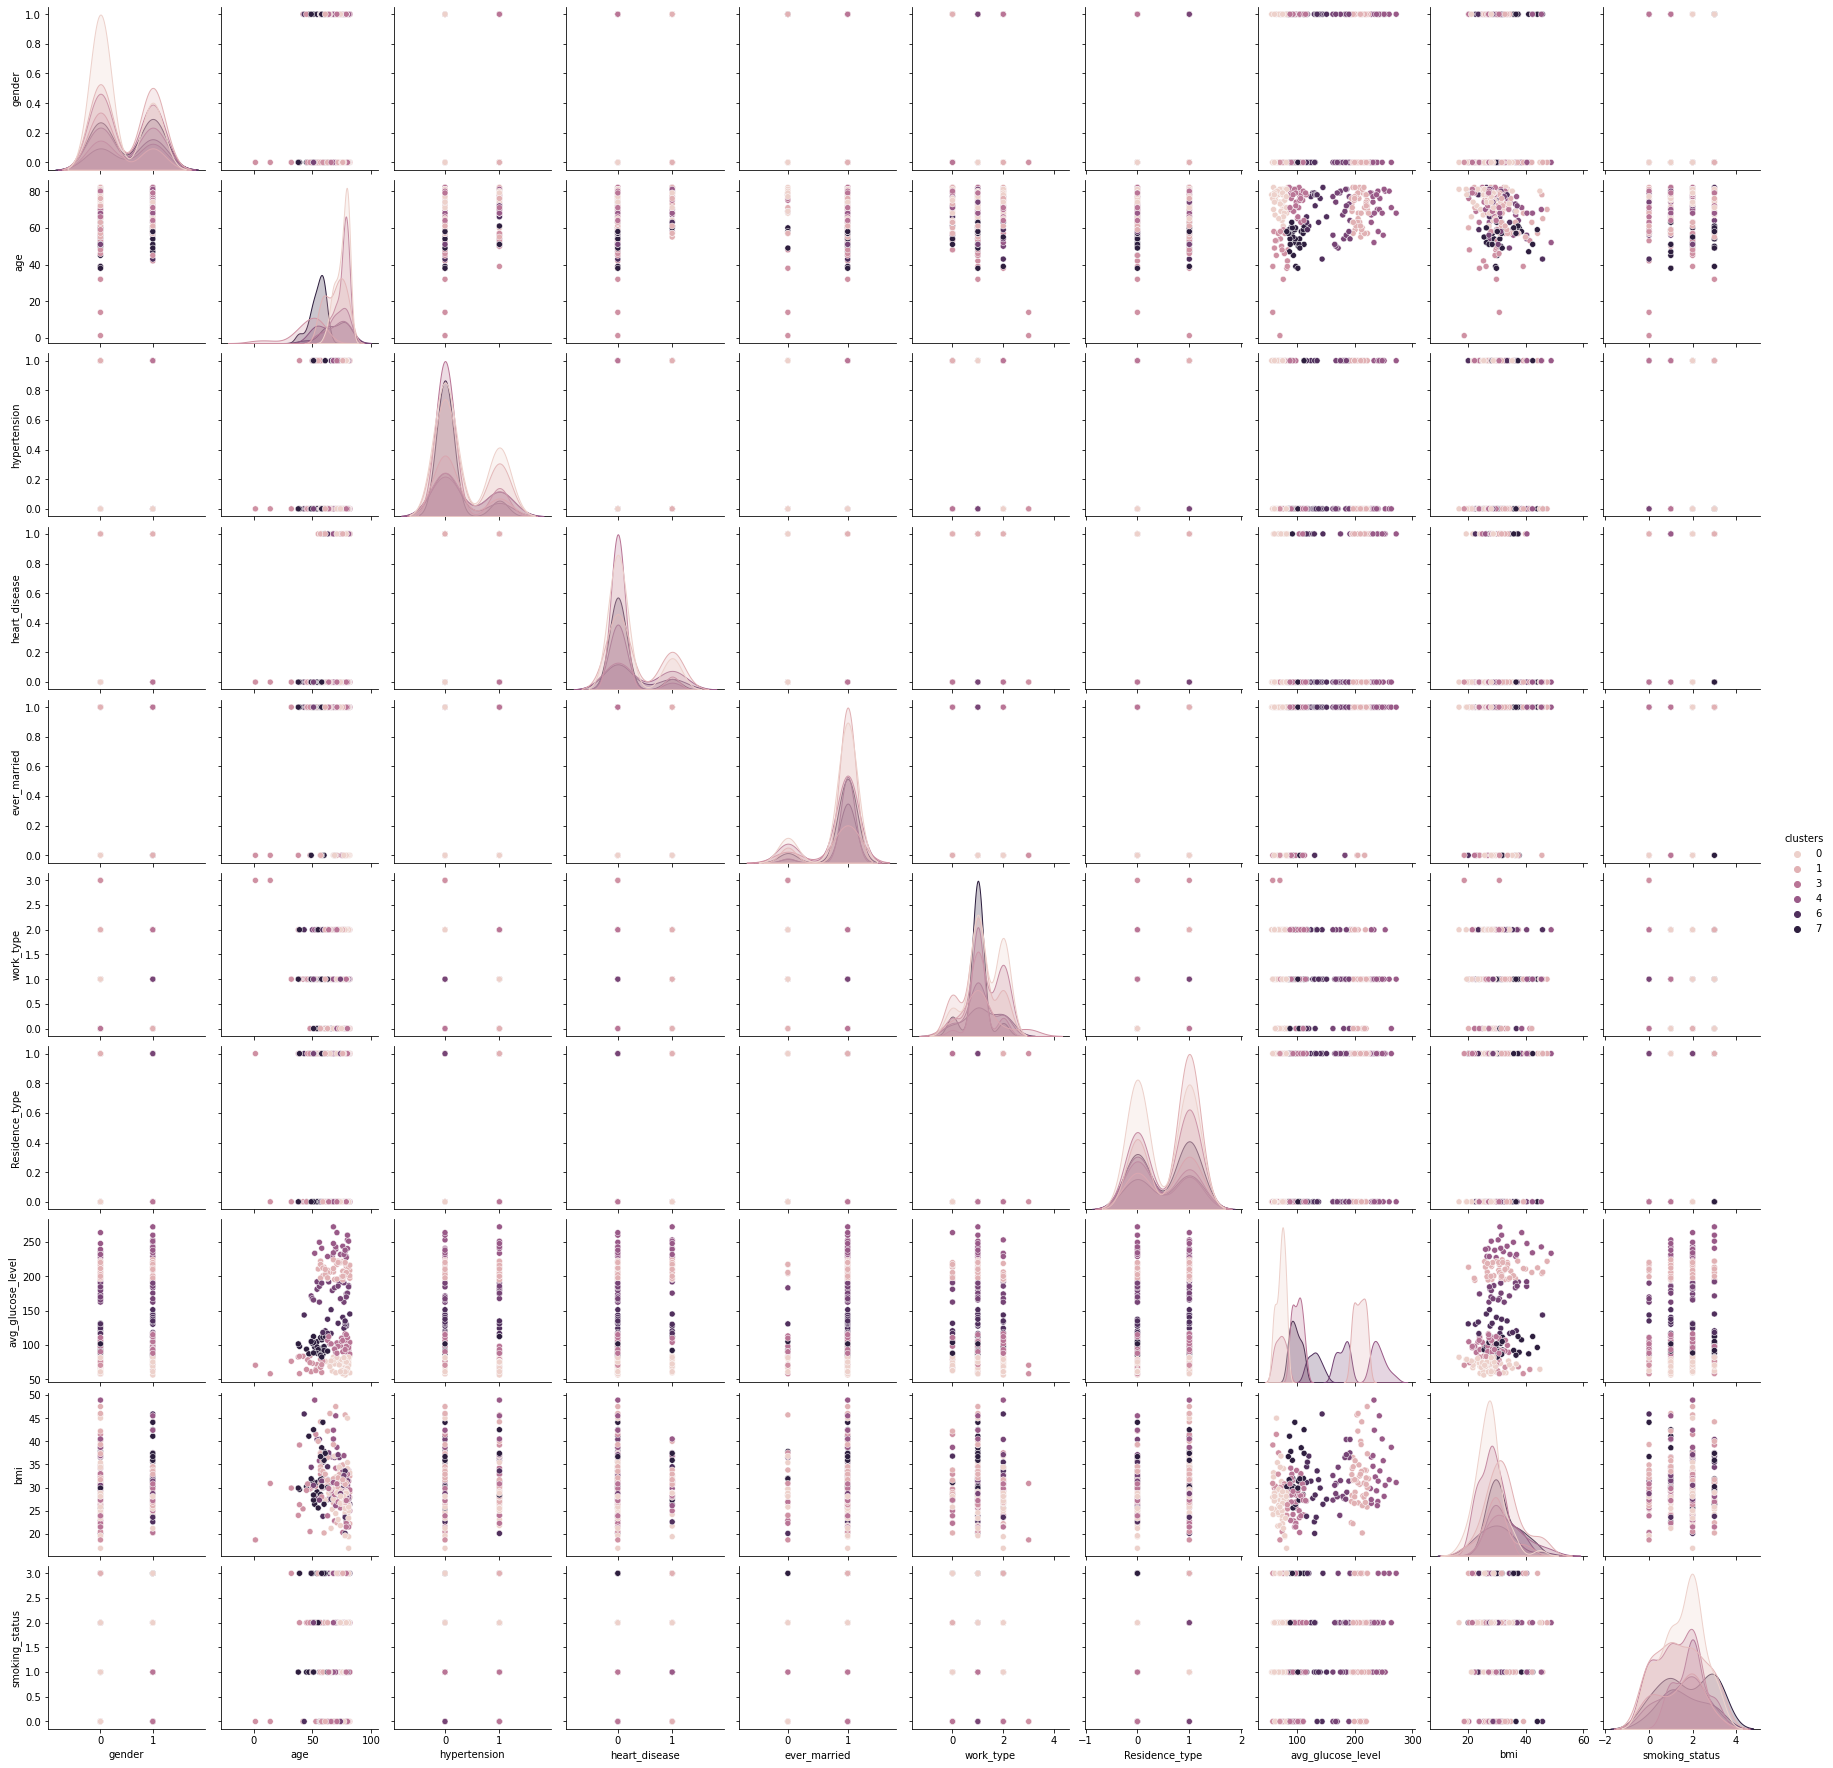

In [29]:
sns.pairplot(data_sick,hue="clusters")

In [30]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

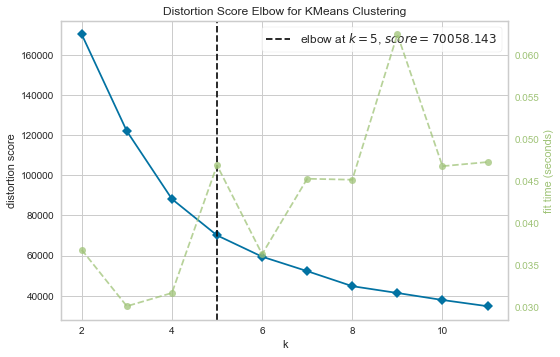

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
sick_kmeans=KMeans()

visualizer=KElbowVisualizer(sick_kmeans,k=(2,12))
visualizer.fit(data_sick)
visualizer.show()

In [32]:
sick_kmeans=KMeans(n_clusters=5)
sick_kmeans.fit(data_sick)
sick_clusters=sick_kmeans.predict(data_sick)

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
data_sick["clusters"]=sick_clusters

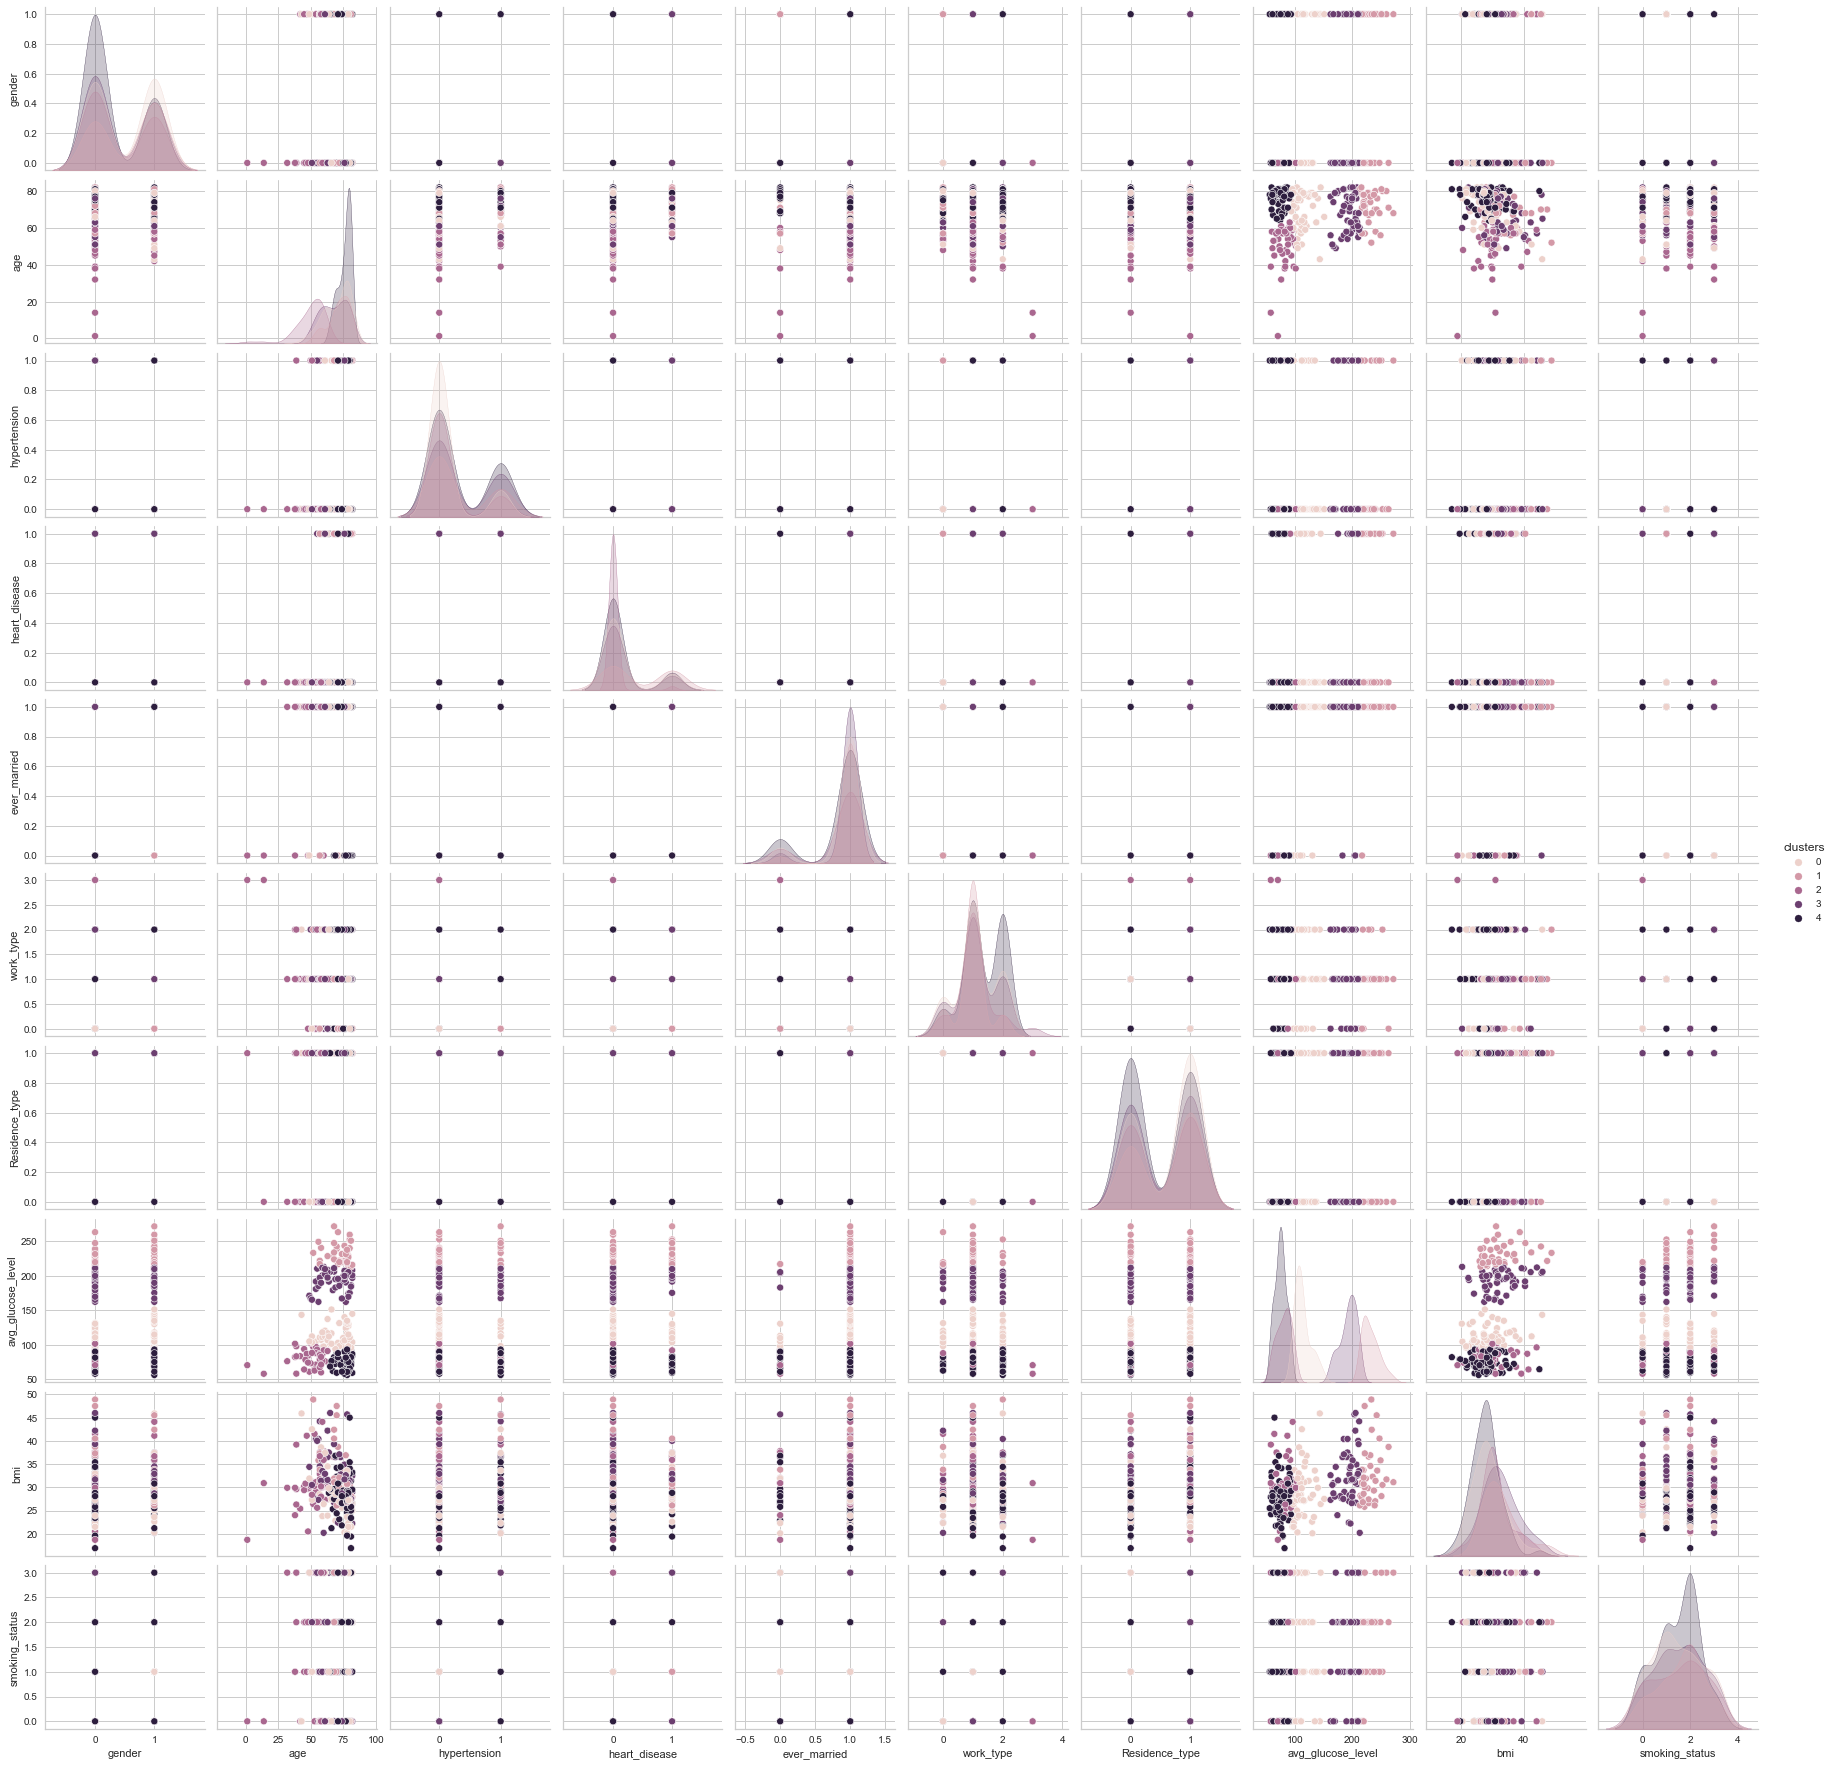

In [34]:
sns.pairplot(data_sick,hue="clusters")

In [35]:
data_sick.groupby('clusters')[data_sick.columns].mean()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.509091  69.890909      0.145455       0.181818      0.890909   
1         0.578947  71.500000      0.315789       0.447368      0.947368   
2         0.404762  49.388571      0.166667       0.023810      0.833333   
3         0.420000  67.800000      0.360000       0.180000      0.940000   
4         0.317460  76.095238      0.333333       0.158730      0.825397   

          work_type  Residence_type  avg_glucose_level        bmi  \
clusters                                                            
0          1.109091        0.618182         113.036909  28.754545   
1          0.973684        0.605263         232.093947  32.818421   
2          1.095238        0.523810          80.643095  30.716667   
3          1.120000        0.520000         192.728600  32.466000   
4          1.333333        0.476190          74.912698  27.687302   

          smoking_status  clusters  
clusters                            
0               1.454545       0.0  
1               1.605263       1.0  
2               1.523810       2.0  
3               1.540000       3.0  
4               1.460317       4.0

In [36]:
data_sick.groupby('clusters')[data_sick.columns].std()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.504525  10.064004      0.355808       0.389249      0.314627   
1         0.500355   8.228986      0.471069       0.503897      0.226294   
2         0.496796  12.200601      0.377195       0.154303      0.377195   
3         0.498569   9.847822      0.484873       0.388088      0.239898   
4         0.469227   4.904620      0.475191       0.368359      0.382677   

          work_type  Residence_type  avg_glucose_level       bmi  \
clusters                                                           
0          0.657513        0.490310          13.988020  5.275935   
1          0.492475        0.495355          14.785208  5.934774   
2          0.655540        0.505487          12.581019  5.128349   
3          0.659004        0.504672          14.477748  5.849389   
4          0.647576        0.503444           9.904139  4.588924   

          smoking_status  clusters  
clusters                            
0               1.033122       0.0  
1               0.945529       0.0  
2               1.087357       0.0  
3               1.014386       0.0  
4               0.894885       0.0

In [37]:
sick_numerical_data=data_sick[["age","avg_glucose_level","bmi"]]

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

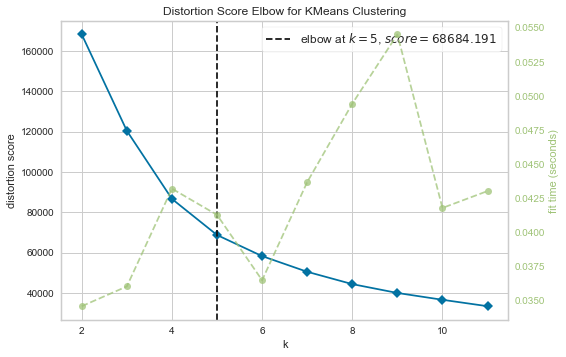

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
sick_kmeans=KMeans()

visualizer=KElbowVisualizer(sick_kmeans,k=(2,12))
visualizer.fit(sick_numerical_data)
visualizer.show()

# PCA

In [39]:
data=data[["age","avg_glucose_level","bmi"]]

In [40]:
scaler_=StandardScaler()
df=scaler_.fit_transform(data)

In [41]:
red_pca=PCA()
df=red_pca.fit_transform(df)
red_pca.explained_variance_ratio_.cumsum()


array([0.51330608, 0.79286603, 1.        ])

## variance expliquee

In [42]:
eig=pd.DataFrame(
{
    "Dimension": ["Dim" + str(x + 1) for x in range(3)],
    "Variance expliquee" : red_pca.explained_variance_,
     "Variance expliquee %" : np.round(red_pca.explained_variance_ratio_*100),
    "Cum Variance expliquee %" : np.round(np.cumsum(red_pca.explained_variance_ratio_*100))
}
)

In [43]:
eig

Dimension  Variance expliquee  Variance expliquee %  \
0      Dim1            1.540227                  51.0   
1      Dim2            0.838848                  28.0   
2      Dim3            0.621527                  21.0   

   Cum Variance expliquee %  
0                      51.0  
1                      79.0  
2                     100.0

## representation of var

In [44]:
n=sick_numerical_data.shape[0]
p=sick_numerical_data.shape[1]

In [45]:
eigval=(n-1)/n*red_pca.explained_variance_
sqrt_eigval=np.sqrt(eigval)

In [46]:
corvar=np.zeros((p,p))

In [47]:
for k in range(p):
    corvar[:,k]=red_pca.components_[k,:]*sqrt_eigval[k]

In [48]:
coord_var=pd.DataFrame({'id':sick_numerical_data.columns,'COR_1': corvar[:,0],'COR_2': corvar[:,1],'COR_2': corvar[:,2]})

In [49]:
coord_var

id     COR_1     COR_2
0                age  0.782032 -0.580414
1  avg_glucose_level  0.601391  0.106874
2                bmi  0.748847  0.520306

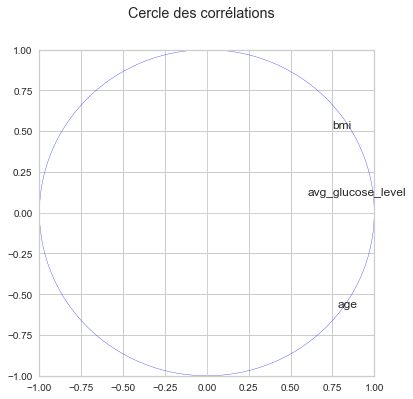

In [50]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coord_var["COR_1"][j],coord_var["COR_2"][j], coord_var["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()


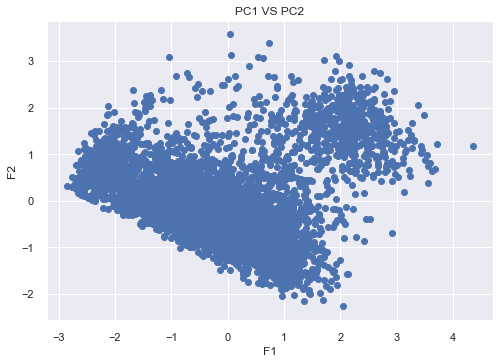

In [51]:
sns.set()
plt.scatter(df[:,0], df[:,1])
plt.xlabel('F1')
plt.ylabel("F2")
plt.title("PC1 VS PC2")
plt.show()

In [61]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             105.92  32.5               2       1  
2                  1             171.23  34.4               3       1  
3                  0             174.12  24.0               2       1  
4                  1             186.21  29.0               1       1  
...              ...                ...   ...             ...     ...  
4976               0              70.15  29.8               1       0  
4977               1             191.15  31.1               3       0  
4978               0              95.02  31.8               3       0  
4979               0              83.94  30.0               3       0  
4980               1              83.75  29.1               2       0  

[4981 rows x 11 columns]

In [62]:
healthy_people=data[data.stroke==0]

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-65-be0d0e641ec1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_people["clusters"]=no_sick_clusters


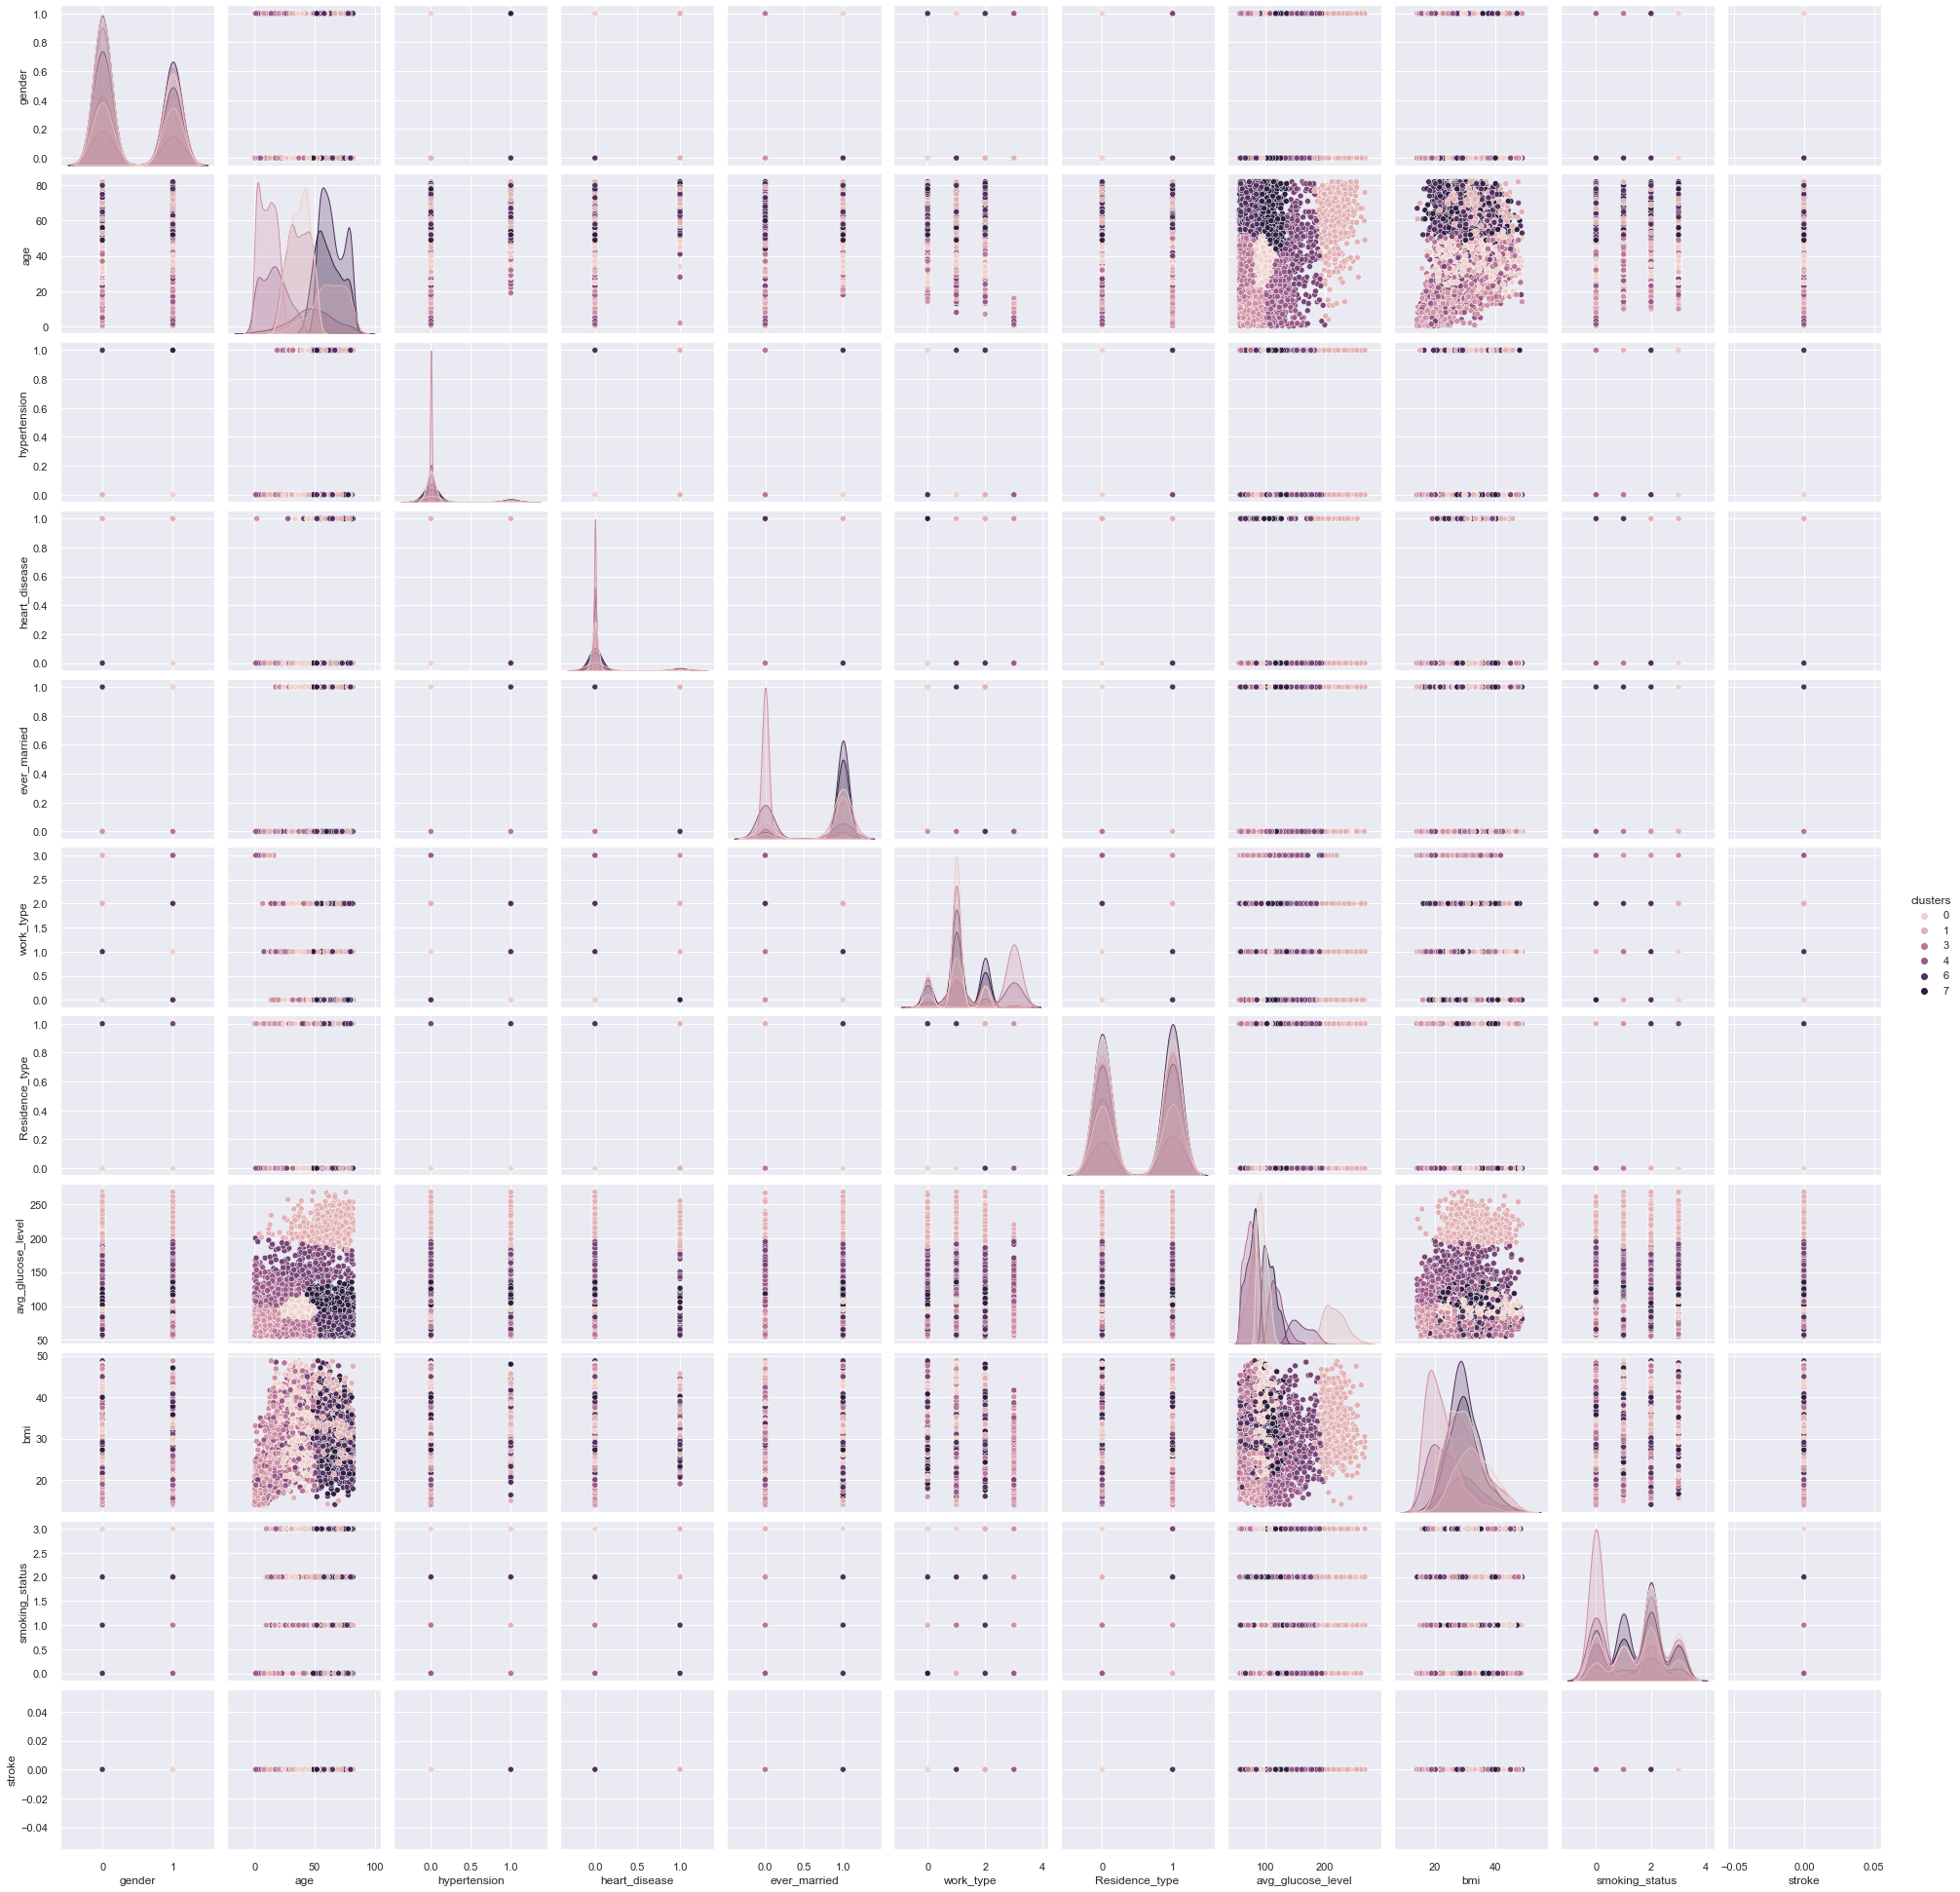

In [65]:
no_kmeans=KMeans()
no_kmeans.fit(healthy_people)
no_sick_clusters=no_kmeans.predict(healthy_people)
healthy_people["clusters"]=no_sick_clusters
sns.pairplot(healthy_people,hue="clusters")

In [68]:
healthy_people.groupby('clusters')[healthy_people.columns].mean()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.376135  37.334630      0.044099       0.018158      0.748379   
1         0.477273  61.050000      0.234091       0.156818      0.895455   
2         0.471098  10.983584      0.001445       0.001445      0.027457   
3         0.340330  36.253373      0.040480       0.004498      0.689655   
4         0.447137  16.490396      0.008811       0.002203      0.171806   
5         0.457364  47.661705      0.147287       0.062016      0.794574   
6         0.409147  65.206428      0.137206       0.090235      0.911001   
7         0.406542  61.512461      0.147975       0.079439      0.920561   

          work_type  Residence_type  avg_glucose_level        bmi  \
clusters                                                            
0          0.940337        0.495460          94.067043  30.173152   
1          1.125000        0.504545         216.694909  32.642727   
2          2.297688        0.508671          80.378873  21.848555   
3          0.934033        0.517241          69.544348  30.006897   
4          1.896476        0.473568         119.076498  24.147137   
5          1.135659        0.538760         159.423256  30.268992   
6          1.126082        0.516687          75.541310  29.515204   
7          1.098131        0.504673         107.072866  29.677570   

          smoking_status  stroke  clusters  
clusters                                    
0               1.642023     0.0       0.0  
1               1.609091     0.0       1.0  
2               0.573699     0.0       2.0  
3               1.682159     0.0       3.0  
4               0.905286     0.0       4.0  
5               1.546512     0.0       5.0  
6               1.477132     0.0       6.0  
7               1.556075     0.0       7.0

In [69]:
healthy_people.groupby('clusters')[healthy_people.columns].std()

gender        age  hypertension  heart_disease  ever_married  \
clusters                                                                   
0         0.484729   8.428127      0.205447       0.133610      0.434226   
1         0.500052  14.904319      0.423911       0.364043      0.306315   
2         0.499525   6.941961      0.038014       0.038014      0.163528   
3         0.474176   8.791562      0.197229       0.066965      0.462982   
4         0.497746  10.622825      0.093553       0.046932      0.377628   
5         0.499147  17.916930      0.355080       0.241652      0.404798   
6         0.491981   9.445160      0.344278       0.286695      0.284918   
7         0.491571  10.603799      0.355352       0.270634      0.270634   

          work_type  Residence_type  avg_glucose_level       bmi  \
clusters                                                           
0          0.516300        0.500304           7.984456  6.471279   
1          0.658093        0.500548          17.426255  6.222367   
2          0.968891        0.500286          11.229902  5.360564   
3          0.530026        0.500078           7.426417  6.497399   
4          1.057021        0.499852          12.355033  6.201736   
5          0.672564        0.499464          16.893983  6.530632   
6          0.651673        0.500031           9.856398  5.369268   
7          0.649994        0.500368          10.557081  5.465877   

          smoking_status  stroke  clusters  
clusters                                    
0               1.031452     0.0       0.0  
1               0.926408     0.0       0.0  
2               0.957295     0.0       0.0  
3               1.019787     0.0       0.0  
4               1.078515     0.0       0.0  
5               1.058488     0.0       0.0  
6               0.968455     0.0       0.0  
7               1.016618     0.0       0.0

False